# Digital Futures Academy Project: **Swan Teleco**
> Team Name: *Swanning About Solutions*  
> Team Members: Archie, Robin, Mithuna

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
# Read the data into a Pandas DataFrame
data = pd.read_excel("1 - Project Data.xlsx")

`data` DataFrame for train-test split

In [6]:
data.set_index('CustomerID', inplace=True)

`swan` DataFrame for EDA

In [8]:
swan = data.copy()

In [9]:
swan.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


## <u>**EDA**<u>

### Cleaning
* Redundant column removal
  * `Churn Label`
* Correcting data types
  * `Total Charges` --> object to float
* Null Value handling
  * Replace ' ' with 0 where `Total Charges == ' '`

In [12]:
# Check nulls and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Securit

In [13]:
# Check there are no duplicates
len(data) == len(data.drop_duplicates())

True

In [14]:
# Check number of rows
data.shape[0]

7043

In [15]:
# Check Churn Label is coded to Churn Value correctly
((data['Churn Label'] == 'No')&(data['Churn Value'] == 0)).sum() + ((data['Churn Label'] == 'Yes')&(data['Churn Value'] == 1)).sum()

7043

In [16]:
# Drop redundant column
data.drop(columns = ['Churn Label'], inplace =True)

In [17]:
# Locate sneaky missing values in Total Charges
(data['Total Charges'] == ' ').sum()

11

In [18]:
# Check that there's no inconsistancy with tenure
data[data['Total Charges'] == ' ']['Tenure Months']

CustomerID
4472-LVYGI    0
3115-CZMZD    0
5709-LVOEQ    0
4367-NUYAO    0
1371-DWPAZ    0
7644-OMVMY    0
3213-VVOLG    0
2520-SGTTA    0
2923-ARZLG    0
4075-WKNIU    0
2775-SEFEE    0
Name: Tenure Months, dtype: int64

In [19]:
# Rewrite missing ' ' as 0
data['Total Charges'].replace(' ', 0, inplace=True)

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/1432883751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Charges'].replace(' ', 0, inplace=True)
/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/1432883751.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [20]:
# Prepare as float
data['Total Charges'] = data['Total Charges'].astype(float)

### **Train-Test Split**

In [22]:
feature_cols = list(data.columns)
feature_cols.remove('Churn Value')

X = data[feature_cols]
y = data['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Check indexes line up
(X_train.index != y_train.index).sum()

0

### **Visualisations**

**Churn by Senior Citizen, Partner, and Dependents**

This visualisation explores how churn relates to:
- Whether the customer is a **Senior Citizen**
- Whether they have a **Partner**
- Whether they have **Dependents**

Understanding these relationships can inform targeted retention strategies for specific customer groups.


* **Churn by Senior Citizen, Partner, and Dependents**

This visualisation explores how churn relates to:
- Whether the customer is a **Senior Citizen**
- Whether they have a **Partner**
- Whether they have **Dependents**

Understanding these relationships can inform targeted retention strategies for specific customer groups.


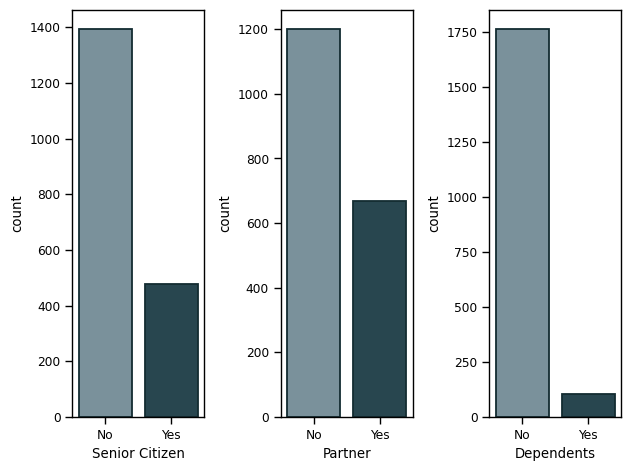

In [27]:
colors = ['#7593A0', '#224955']
edges = ['#132C31']

sns.set_context('paper')

#plt.subplot(3,1,1)
#sns.countplot(data = swan[swan['Churn Value']==1], x = 'Gender',
   #          hue = 'Gender',
    #         palette = colors,
    #         linewidth=1.3,
     #        edgecolor = edges)

plt.subplot(1,3,1)
sns.countplot(data = swan[swan['Churn Value']==1], x = 'Senior Citizen',
             hue = 'Senior Citizen',
             palette = colors,
             linewidth=1.3,
             edgecolor = edges)

plt.subplot(1,3,2)
sns.countplot(data = swan[swan['Churn Value']==1], x = 'Partner',
             hue = 'Partner',
             palette = colors,
             linewidth=1.3,
             edgecolor = edges)

plt.subplot(1,3,3)
sns.countplot(data = swan[swan['Churn Value']==1], x = 'Dependents',
             hue = 'Dependents',
             palette = colors,
             linewidth=1.3,
             edgecolor = edges)



plt.tight_layout()

plt.savefig('Demo2.jpg')


* **Churn by Phone Service Type**

This stacked bar chart shows the number of customers who **churned** or **stayed**, segmented by their **Phone Service type**. 

Each segment is annotated with the actual count to make the chart easier to interpret.

In [29]:
phone_df = pd.DataFrame({'Phone Services':['No Phone Service','Single Line','Multiple Lines'],
                         'Churned':[len(swan[(swan['Multiple Lines']=='No phone service')&(swan['Churn Value']==1)]),
                                     len(swan[(swan['Multiple Lines']=='No')&(swan['Churn Value']==1)]),
                                     len(swan[(swan['Multiple Lines']=='Yes')&(swan['Churn Value']==1)])],
                         'Stayed':[len(swan[(swan['Multiple Lines']=='No phone service')&(swan['Churn Value']==0)]),
                                     len(swan[(swan['Multiple Lines']=='No')&(swan['Churn Value']==0)]),
                                     len(swan[(swan['Multiple Lines']=='Yes')&(swan['Churn Value']==0)])]})
phone_df

,Phone Services,Churned,Stayed
0,No Phone Service,170,512
1,Single Line,849,2541
2,Multiple Lines,850,2121


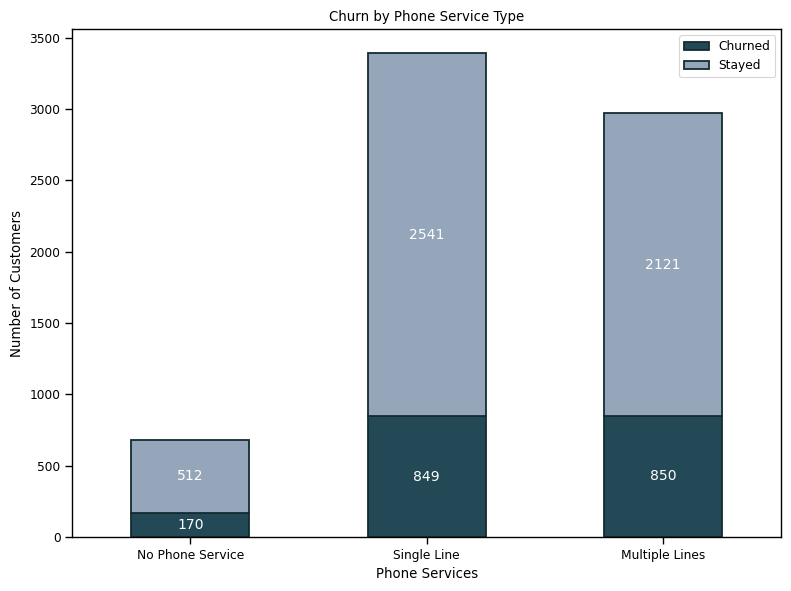

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#224955', '#95A6BA']
edges = ['#132C31']

sns.set_context('paper')

# Plot
ax = phone_df.set_index('Phone Services').plot(kind='bar',
                                               stacked=True,
                                               color=colors,
                                               linewidth=1.3,
                                               edgecolor=edges,
                                               figsize=(8,6))

plt.xticks(rotation=0)
plt.title('Churn by Phone Service Type')
plt.ylabel('Number of Customers')

# Annotate with total counts on top of bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (x + width/2, y + height/2),
                    ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.savefig('Phone_Services_annotated.jpg')
plt.show()

* **Churn by Contract Type**

This visualisation shows how churn varies by the **type of contract** customers have:
- **Month-to-month**
- **One year**
- **Two year**

It also includes **counts directly on the bars** for better readability.


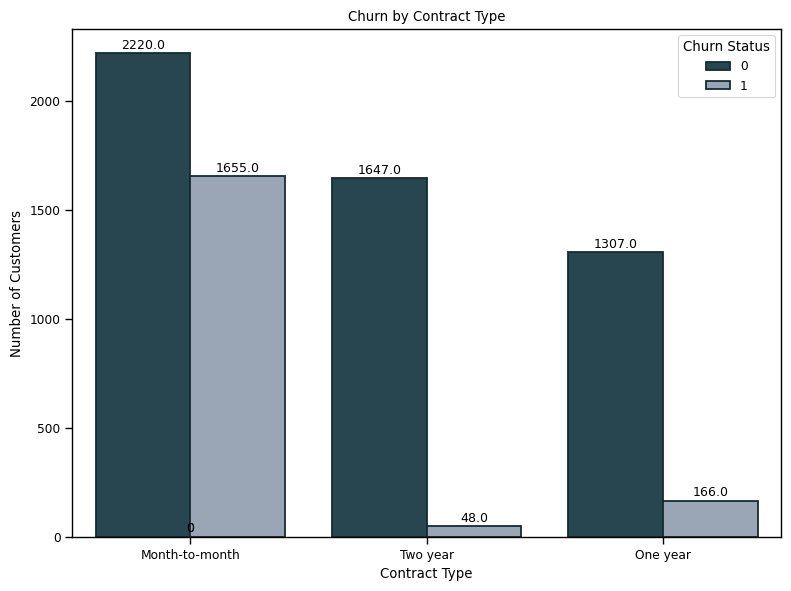

In [32]:
colors = ['#224955', '#95A6BA']
edges = '#132C31'

plt.figure(figsize=(8,6))

ax = sns.countplot(data=swan, 
                   x='Contract', 
                   hue='Churn Value', 
                   palette=colors,
                   linewidth=1.3,
                   edgecolor=edges)

plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')

# Annotate each bar with count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points', 
                fontsize=9, color='black')

plt.tight_layout()
plt.show()


* **Tenure Distribution by Churn Status**

This boxplot shows the **distribution of tenure (number of months a customer has stayed)**, split by churn status.

It helps identify whether **customers with shorter tenure are more likely to churn**.

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/3338470622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=swan, x='Churn Value', y='Tenure Months', palette=colors)


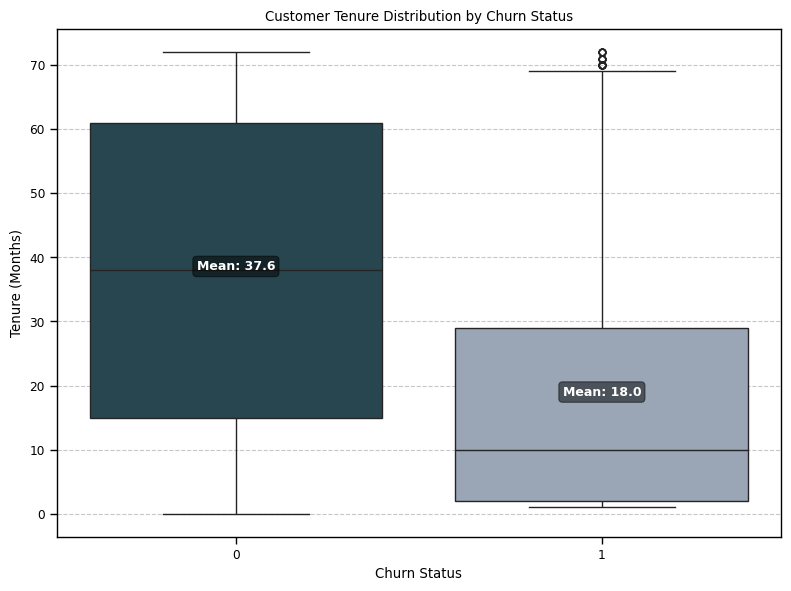

In [34]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(data=swan, x='Churn Value', y='Tenure Months', palette=colors)

# Calculate mean tenure per churn label
means = swan.groupby('Churn Value')['Tenure Months'].mean()

# Plot mean markers and annotate on each box
for i, mean in enumerate(means):
    ax.scatter(i, mean, color='red', marker='D', s=40, label='Mean' if i == 0 else "")
    ax.text(i, mean, f'Mean: {mean:.1f}', 
            horizontalalignment='center', 
            verticalalignment='bottom', 
            color='white', fontsize=9, weight='bold',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.title('Customer Tenure Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Months)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

>  **Insight Box**
>
> The boxplot above shows the **tenure distribution** (in months) between customers who **churned** (`Churn Label = Yes`) and those who **stayed** (`Churn Label = No`).
>
> - **Churned customers**: Have a **mean tenure of ~18 months**. This means on average, customers who leave tend to leave within the first 1 to 1.5 years.
> - **Retained customers**: Have a **mean tenure of ~38 months**, showing that longer-tenured customers are more likely to stay.
>
>  **Key takeaway**:  
> Customers with a **shorter tenure are more likely to churn**, which makes **tenure months a critical feature** in predicting churn.  
> Retention strategies should focus on customers **early in their lifecycle (under 20 months)** to prevent churn.


*  **Monthly Charges by Churn Status**

This visualisation compares the **Monthly Charges** paid by customers who churned versus those who stayed.

This helps us see if **higher or lower bills correlate with churn**.

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/148775709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=swan, x='Churn Value', y='Monthly Charges', palette=colors)


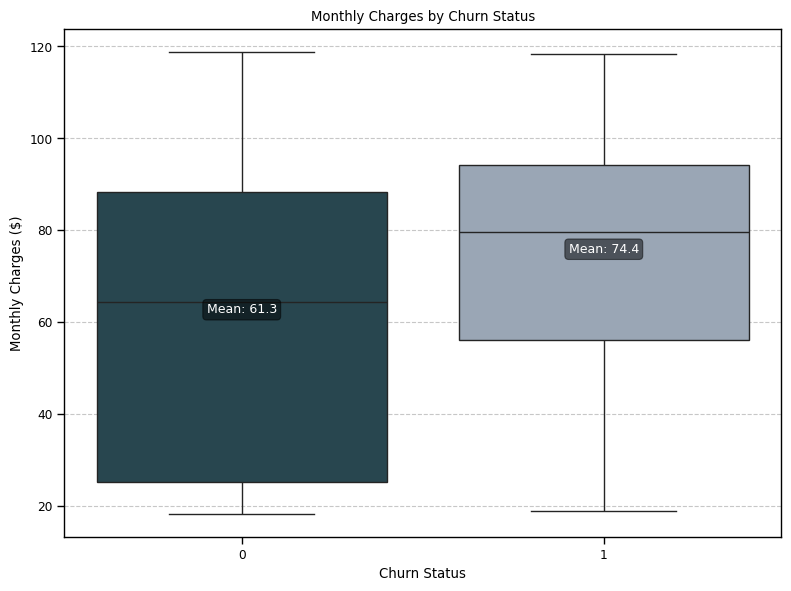

In [37]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(data=swan, x='Churn Value', y='Monthly Charges', palette=colors)

means = swan.groupby('Churn Value')['Monthly Charges'].mean()

for i, mean in enumerate(means):
    ax.scatter(i, mean, color='red', marker='D', s=40, label='Mean' if i == 0 else "")
    ax.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', color='white', fontsize=9,
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Churn by Payment Method**

This visualisation explores the relationship between **Payment Method** and churn status.  
Certain payment types may be linked to higher or lower churn rates.


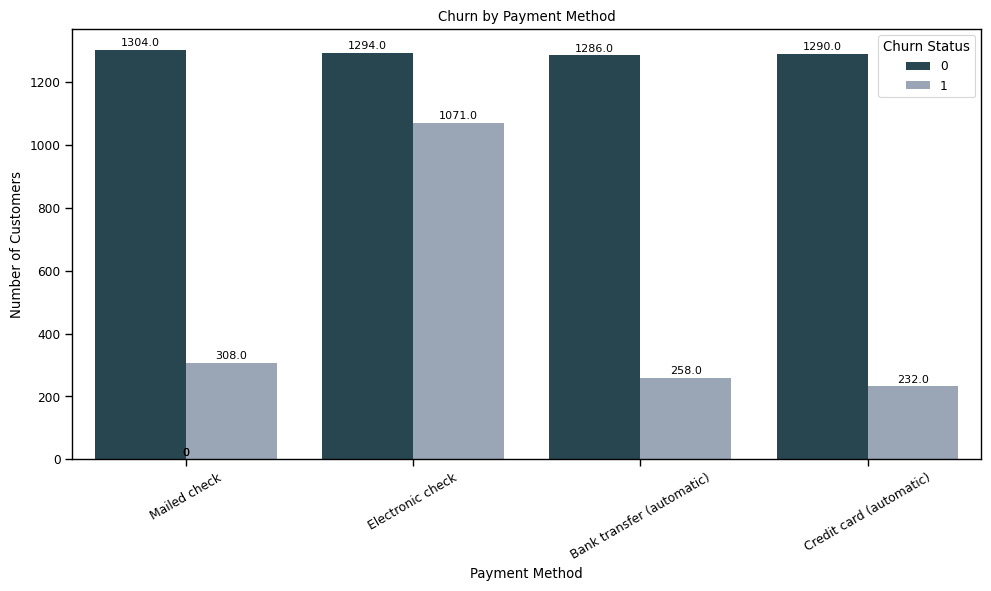

In [39]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data=swan, x='Payment Method', hue='Churn Value', palette=colors)

plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)
plt.legend(title='Churn Status')

# Annotate counts on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=8)

plt.tight_layout()
plt.show()


* **Churn by Internet Service Type**

This visualisation examines the relationship between the type of internet service (DSL, Fiber Optic, None) and churn status.

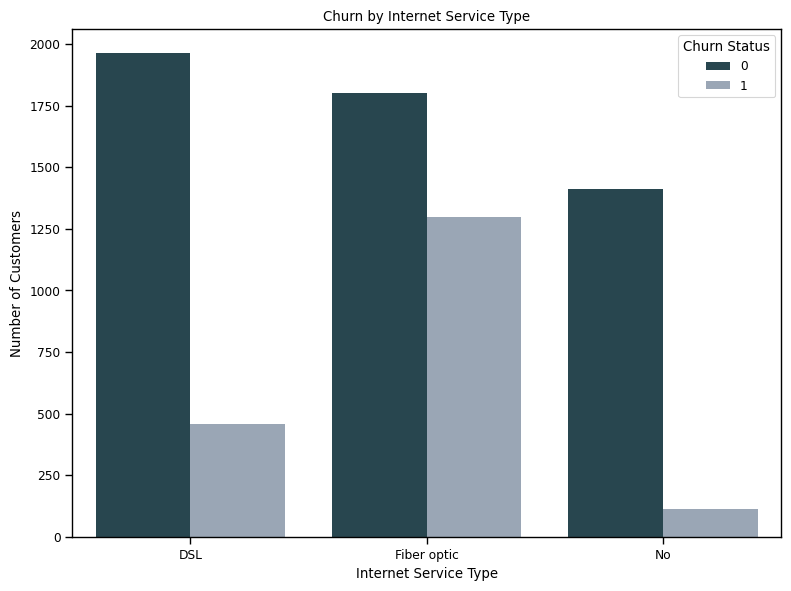

In [41]:
plt.figure(figsize=(8,6))

ax = sns.countplot(data=swan, x='Internet Service', hue='Churn Value', palette=colors)

plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()

 **Total Charges by Churn Status**

This boxplot shows the **Total Charges** (the total amount paid by the customer so far) split by churn status.

It helps us understand if **total spend over time** has any relationship with a customer leaving or staying.


/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/3173009866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  swan['Total Charges'].replace(' ', 0, inplace=True)
/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/3173009866.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

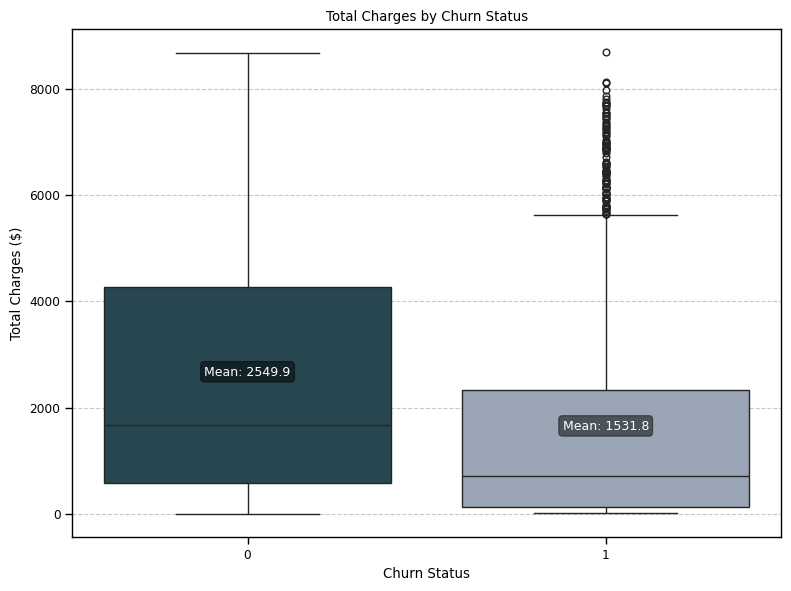

In [43]:
swan['Total Charges'].replace(' ', 0, inplace=True)

# Define color palette
colors = ['#224955', '#95A6BA']

plt.figure(figsize=(8,6))

ax = sns.boxplot(data=swan, x='Churn Value', y='Total Charges', palette=colors)

# Calculate mean total charges per churn label
means = swan.groupby('Churn Value')['Total Charges'].mean()

for i, mean in enumerate(means):
    ax.scatter(i, mean, color='red', marker='D', s=40, label='Mean' if i == 0 else "")
    ax.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', color='white', fontsize=9,
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

plt.title('Total Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Charges ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Correlation Heatmap of Numerical Features**

This heatmap shows the **correlation between numerical features** such as:
- Tenure Months
- Monthly Charges
- Total Charges
- Churn Value (encoded as 0 or 1)

This helps understand which variables are most related to churn and to each other.


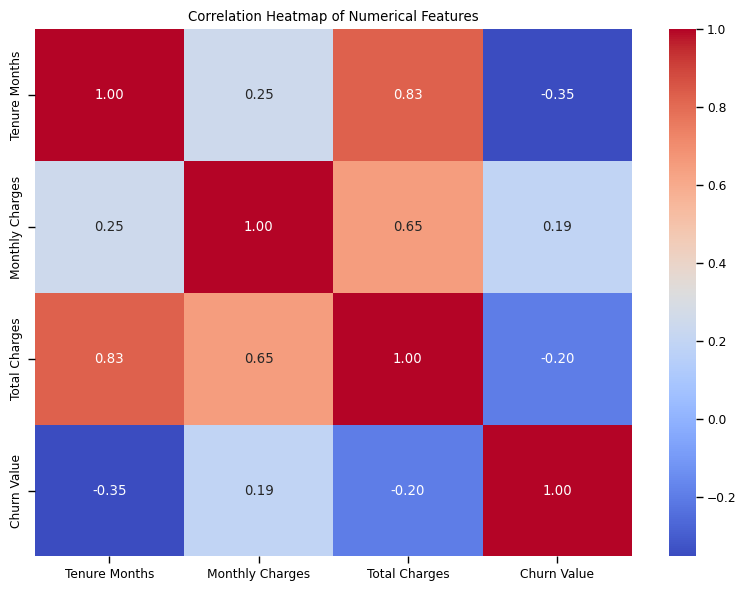

In [45]:
plt.figure(figsize=(8,6))

numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']
corr = swan[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

**Churn Rate by Contract Type and Payment Method**

This visualisation shows the churn rate for **each combination of Contract Type and Payment Method**.  
It helps spot high churn risk groups based on how they pay and their contract length.

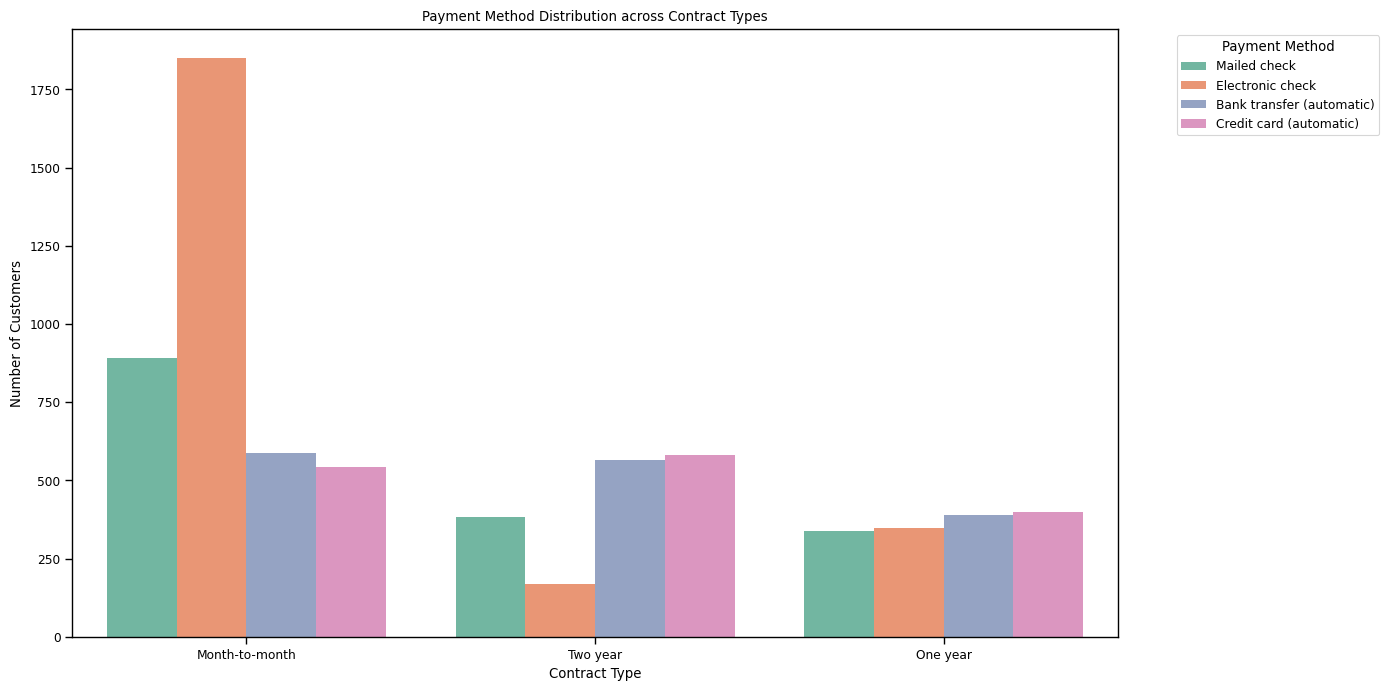

In [47]:
plt.figure(figsize=(14,7))

ax = sns.countplot(data=swan, x='Contract', hue='Payment Method', palette='Set2', hue_order=swan['Payment Method'].unique())

plt.title('Payment Method Distribution across Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## <u>**Feature Engineering**<u>

* Drop from Feature List: `CustomerID`,`Count`,`Country`,`State`,`City`,`Zip Code`,`Lat Long`,`Churn Reason`
> Not important or redundant 
* Boolean Label Encode: `Gender`,`Senior Citizen`,`Partner`,`Dependents`,`Phone Service`,`Paperless Billing`,`Multiple Lines`,`Online Security`,`Online Backup`,`Device Protection`,`Tech Support`,`Streaming TV`,`Streaming Movies`
* Order Label Encode: `Contract`
* One-Hot Encode: `Internet Service`,`Payment Method`
* Feature Scaling: Max-Min Scale every feature
* Feature Selection: Select Features **correlated** with the target using `.corr()`. Drop features where **multicolinearity** using a user-defined VIF function `calculate_vif`.

### **General Feature Engineering**

In [51]:
def bool_labeling(df, col_name):
    df = df.copy()
    col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)
    return col

In [52]:
def gender_bool_labeling(df, col_name):
    df = df.copy()
    col = df[col_name].replace({'Male':0,'Female':1,0:0,1:1})
    return col

In [53]:
def contract_labeling(df, col_name):
    df=df.copy()
    col = df[col_name].replace({'One year':12,'Month-to-month':1,'Two year':24})
    return col

In [54]:
def ohe(df, col_name):
    df=df.copy()
    df=pd.get_dummies(df, columns = [f'{col_name}'], prefix = f'{col_name}', drop_first = True, dtype='int')
    return df

In [281]:
def feature_engineering(df):
    df=df.copy()

    df = sm.add_constant(df)
    
    df.drop(columns=['Count','Country','State','City','Zip Code','Lat Long','Churn Reason'],inplace = True)

    for col_name in ['Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing','Multiple Lines',
                     'Online Security','Online Backup','Device Protection','Tech Support','Streaming TV',
                     'Streaming Movies']:
        df[col_name] = bool_labeling(df, col_name)

    df['Gender'] = gender_bool_labeling(df, 'Gender')
    
    df = ohe(df,'Internet Service')
    df = ohe(df,'Payment Method')
    df = ohe(df,'Contract')
    
    return df

In [283]:
X_train_fe = feature_engineering(X_train)

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/2918864045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)


In [284]:
X_test_fe = feature_engineering(X_test)

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/2918864045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)


### **Scaling** `train_minmax`

In [286]:
train_minmax = MinMaxScaler() ## Initialise scaler
train_minmax.fit(X_train_fe)

MinMaxScaler()

In [288]:
def max_min(df):
    global train_minmax
    df=df.copy()
    df = train_minmax.transform(df)
    return df

In [290]:
X_train_fe_scaled = pd.DataFrame(max_min(X_train_fe), index = X_train_fe.index, columns = X_train_fe.columns)

In [292]:
X_test_fe_scaled = pd.DataFrame(max_min(X_test_fe), index = X_test_fe.index, columns = X_test_fe.columns)

### **Feature Selection** `selected_features`

* #### **Based on Correlation with the target**

In [297]:
# Re-combine X_train and y_train

# Align Indices
y_train_for_corr = pd.DataFrame({'CustomerID':X_train_fe_scaled.index,
                                 'Churn Value':y_train})
y_train_for_corr.set_index('CustomerID',inplace=True)
#Re-combine
training_set = pd.concat([X_train_fe_scaled, y_train_for_corr], axis=1)
#Find columns with correlation to the target
corr_features = [col for col in X_train_fe_scaled.columns if abs(training_set.corr()['Churn Value'][col]) >= 0.1]
corr_features

['Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Online Security',
 'Tech Support',
 'Paperless Billing',
 'Monthly Charges',
 'Total Charges',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Payment Method_Credit card (automatic)',
 'Payment Method_Electronic check',
 'Contract_One year',
 'Contract_Two year']

* #### **Based on ViF Score**

In [300]:
## This a piece of code from stats.stackexchange.com

## It runs the model with all the variables.
## If any of them have a higher VIF than 4, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 10.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    return list(X.columns[variables]) # finally, we print the variables that are still in our set
   

In [301]:
vif_features = calculate_vif(X_train_fe_scaled[corr_features], thresh = 10)
vif_features

dropping 'Monthly Charges' at index: 7
dropping 'Tenure Months' at index: 3
Remaining variables:


['Senior Citizen',
 'Partner',
 'Dependents',
 'Online Security',
 'Tech Support',
 'Paperless Billing',
 'Total Charges',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Payment Method_Credit card (automatic)',
 'Payment Method_Electronic check',
 'Contract_One year',
 'Contract_Two year']

* #### **Final Selection** `selected_features`

In [305]:
selected_features = [
 'Dependents',
 'Online Security',
 'Tech Support',
 'Paperless Billing',
 'Total Charges',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Payment Method_Credit card (automatic)',
 'Payment Method_Electronic check',
 'Contract_One year',
 'Contract_Two year']

# We removed `Senior Citizen` and `Partner` as early testing showed high p-values

In [307]:
# X_train =>> General Feature Engineered --> 
#             Scaled --> 
#             Feature Selection =>> 
#             X_train_final

X_train_final = X_train_fe_scaled[selected_features]

In [309]:
# X_test =>> General Feature Engineered --> 
#             Scaled --> 
#             Feature Selection =>> 
#             X_test_final

X_test_final = X_test_fe_scaled[selected_features] 

## <u>**Modeling (StatsModels)**<u>

In [312]:
log_reg = sm.Logit(y_train, X_train_final)

In [314]:
result = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.411475
         Iterations 8


In [316]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5623
Method:                           MLE   Df Model:                           10
Date:                Wed, 23 Jul 2025   Pseudo R-squ.:                  0.2829
Time:                        10:04:20   Log-Likelihood:                -2318.2
converged:                       True   LL-Null:                       -3232.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Dependents                                -1.4831      0.123    -12.039      0.000      -1.725      -1.242
Online Security                           -0.54

### **Choose your threshold**

In [319]:
threshold = 0.352

In [321]:
results_train = pd.DataFrame()
results_train['y_train_prob'] = result.predict(X_train_final)
results_train['y_train_pred'] = (results_train['y_train_prob']>threshold).astype(int)
results_train['y_train'] = y_train
results_train.head()

,y_train_prob,y_train_pred,y_train
CustomerID,,,
9571-EDEBV,0.129244,0,0
7562-GSUHK,0.566266,1,1
2325-WINES,0.261229,0,0
9381-NDKME,0.406188,1,1
2164-SOQXL,0.043647,0,0


In [323]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [325]:
get_results(results_train.y_train,results_train.y_train_pred)

The confusion matrix for your predictions is:
[[3270  895]
 [ 362 1107]] 

The accuracy of your model is: 0.7768903088391906
The recall of your model is: 0.7535738597685501
The precision of your model is: 0.5529470529470529
The F1-score of your model is: 0.6378565254969749


## <u>**Evaluation (StatsModels)**<u>

In [328]:
results_test = pd.DataFrame()
results_test['y_test_prob'] = result.predict(X_test_final)
results_test['y_test_pred'] = (results_test['y_test_prob']>threshold).astype(int)
results_test['y_test'] = y_test
results_test.head()

,y_test_prob,y_test_pred,y_test
CustomerID,,,
2189-WWOEW,0.665663,1,1
2446-ZKVAF,0.351918,0,0
4986-MXSFP,0.211121,0,0
5868-YWPDW,0.740621,1,1
9412-GHEEC,0.353073,1,1


In [330]:
get_results(results_test.y_test,results_test.y_test_pred)

The confusion matrix for your predictions is:
[[788 221]
 [ 98 302]] 

The accuracy of your model is: 0.7735982966643009
The recall of your model is: 0.755
The precision of your model is: 0.5774378585086042
The F1-score of your model is: 0.6543878656554712


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

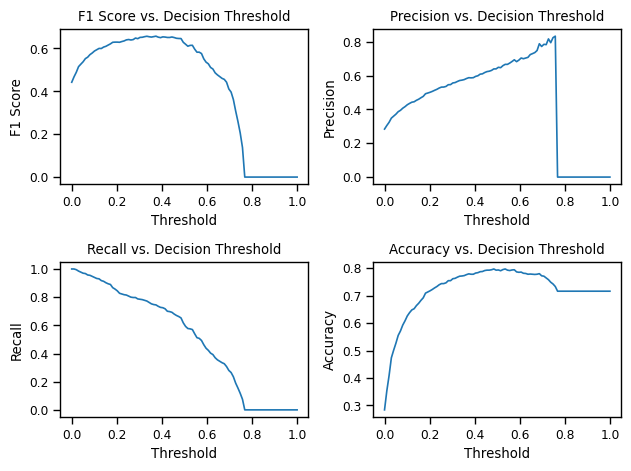

In [332]:
thresholds = np.linspace(0, 1, 100)
f1s = [metrics.f1_score(y_test, (results_test.y_test_prob>t).astype(int)) for t in thresholds]
precisions = [metrics.precision_score(y_test, (results_test.y_test_prob>t).astype(int)) for t in thresholds]
recalls = [metrics.recall_score(y_test, (results_test.y_test_prob>t).astype(int)) for t in thresholds]
accuracies = [metrics.accuracy_score(y_test, (results_test.y_test_prob>t).astype(int)) for t in thresholds]

plt.subplot(2,2,1)
sns.lineplot(x=thresholds,y = f1s)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Decision Threshold")


plt.subplot(2,2,2)
sns.lineplot(x=thresholds, y = precisions)
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Precision vs. Decision Threshold")

plt.subplot(2,2,3)
sns.lineplot(x=thresholds, y= recalls)
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs. Decision Threshold")

plt.subplot(2,2,4)
sns.lineplot(x=thresholds, y=accuracies)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Decision Threshold")

    
plt.tight_layout()

# Predictions for Remaining Customers

In [362]:
mask = data['Churn Value'] == 0

In [364]:
swan_remain = data[mask]

In [365]:
len(swan_remain)

5174

In [366]:
swan_remain_features = swan_remain.copy()
swan_remain_features.drop(columns = 'Churn Value', inplace=True)

In [369]:
# swan_remain =>> General Feature Engineered --> 
#              Scaled --> 
#              Feature Selection =>> 
#              swan_remain_final

swan_remain_features_fe = feature_engineering(swan_remain_features)
swan_remain_features_fe = pd.DataFrame(max_min(swan_remain_features_fe), index = swan_remain_features_fe.index, columns = swan_remain_features_fe.columns)
swan_remain_final = swan_remain_features_fe[selected_features]

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_60765/2918864045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  col = df[col_name].replace({r'^No.*':0,'Yes':1,0:0,1:1}, regex=True)


In [372]:
remain_list = pd.DataFrame()
remain_list['Churn Probability'] = result.predict(swan_remain_final)
remain_list.head()

,Churn Probability
CustomerID,
7590-VHVEG,0.590451
5575-GNVDE,0.134839
7795-CFOCW,0.095860
1452-KIOVK,0.212742
6713-OKOMC,0.350881


In [374]:
Most_at_risk = remain_list.sort_values('Churn Probability',ascending=False).head(500)[['Churn Probability']]

In [376]:
Most_at_risk.head()

,Churn Probability
CustomerID,
5542-TBBWB,0.761183
9603-OAIHC,0.761177
9605-WGJVW,0.761170
1640-PLFMP,0.761168
7465-ZZRVX,0.761163


In [378]:
Most_at_risk.to_csv('most_at_risk.csv')

In [380]:
all_remaining_customers = remain_list[['Churn Probability']]

In [382]:
all_remaining_customers.to_csv('all_remaining_customers.csv')